Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

Answer:

K Nearest Neighbours (KNN) is a supervised, non-paraametric,instance-based algorithm used for both classification and regression. It makes predictions based on the k closest data points in the training set to given input.

KNN - It stores all the training data, computes the distance at the prediction time, uses neighbours to decide the output.

For Classification- if k = 5 and nearest neighbours are Class A, Class A, Class B, Class A, Class B.

Regression -

Each neighbour has a numeric value, the predicted value is the average. If k = 3, then the neighbours are 10, 12, 14.

Question 2: What is the Curse of Dimensionality and how does it affect KNN
performance?

Answer:

The Curse of Dimentionality refers to the problems that arise whent he number of feature in a dataset becomes very large. As dimension increase, the data space grows exponentially, making data points sparse and distance based methods less effective.

In 1D, points lie on a line

In 2D,points lie on a plane

In 100D, points lie in a huge space

KNN works using distance (Euclidean, Manhattan, etc.)

In high dimensions:

All points appear almost equally distant

Nearest neighbors are no longer meaningful

Result:

❌ Lower accuracy

❌ More noise in prediction

Question 3: What is Principal Component Analysis (PCA)? How is it different from
feature selection?

Answer:

PCA is a dimentionality reduction technique, that transforms original features into new features called principal components, which capture maximum variance in the data

How it works - finds directions where data varies the most, creates new un-correlated features.

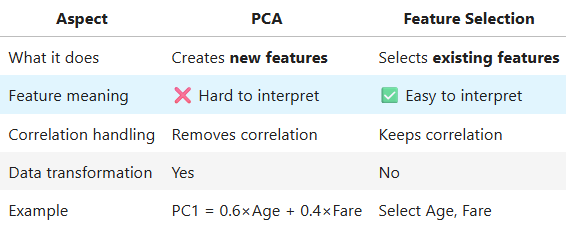

Question 4: What are eigenvalues and eigenvectors in PCA, and why are they
important?

Answer:

What are Eigenvectors in PCA?

Eigenvectors represent the directions (axes) along which the data varies the most.

In PCA, each eigenvector becomes a principal component.

What are Eigenvalues in PCA?

Eigenvalues tell how much variance is captured along each eigenvector.

Larger eigenvalue = more important principal component.

Why are they important in PCA?

PCA finds eigenvectors of the covariance matrix

Eigenvectors → directions of maximum variance

Eigenvalues → amount of variance in those directions

PCA keeps components with largest eigenvalues


Question 5: How do KNN and PCA complement each other when applied in a single
pipeline?

Answer:
Role of PCA

Reduces the number of features, Removes correlation between features, Keeps only important variance, Reduces noise

Role of KNN

Uses distance-based calculations, Sensitive to: High dimensions, Noise, Irrelevant features

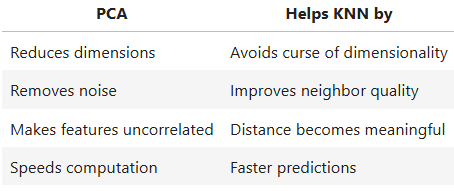


Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.
(Include your Python code and output in the code box below.)


In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN without feature scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc_without_scaling = accuracy_score(y_test, y_pred)

print("Accuracy without scaling:", acc_without_scaling)

#KNN with feature scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_scaled)

print("Accuracy with scaling:", acc_with_scaling)

Accuracy without scaling: 0.7222222222222222
Accuracy with scaling: 0.9444444444444444


Question 7: Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.
(Include your Python code and output in the code box below.)

In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X = wine.data

# Step 1: Scale the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Print explained variance ratio
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var:.4f}")

Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080


Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.


In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN on original

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred)

print("Accuracy on original dataset:", acc_original)

Accuracy on original dataset: 0.9444444444444444


In [5]:
# apply pca and train knn

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy after PCA (2 components):", acc_pca)

Accuracy after PCA (2 components): 1.0


Question 9: Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.
(Include your Python code and output in the code box below.)

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn_euclidean = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euc = knn_euclidean.predict(X_test_scaled)

acc_euclidean = accuracy_score(y_test, y_pred_euc)
print("Accuracy (Euclidean):", acc_euclidean)


Accuracy (Euclidean): 0.9444444444444444


In [7]:
knn_manhattan = KNeighborsClassifier(
    n_neighbors=5,
    metric='manhattan'
)

knn_manhattan.fit(X_train_scaled, y_train)
y_pred_man = knn_manhattan.predict(X_test_scaled)

acc_manhattan = accuracy_score(y_test, y_pred_man)
print("Accuracy (Manhattan):", acc_manhattan)

Accuracy (Manhattan): 0.9444444444444444


Question 10: You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.

Due to the large number of features and a small number of samples, traditional models overfit.

Explain how you would:

● Use PCA to reduce dimensionality

● Decide how many components to keep

● Use KNN for classification post-dimensionality reduction

● Evaluate the model

● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data

(Include your Python code and output in the code box below.)

Answer:

I would first apply PCA to reduce thousands of gene features into a small number of principal components that capture most biological variance. I would select components based on cumulative explained variance and validation performance. KNN would then be trained on the reduced space to perform distance-based classification effectively. The model would be evaluated using cross-validation, F1-score, and ROC-AUC to ensure clinical reliability. This PCA-KNN pipeline reduces overfitting, handles small sample sizes well, and provides a robust and explainable solution suitable for real-world biomedical data.
